In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [41]:
import pandas as pd
import re
import datetime

Gegevens van `KONINKLIJK NEDERLANDS METEOROLOGISCH INSTITUUT (KNMI)`. 

Zie: https://projects.knmi.nl/klimatologie/onderzoeksgegevens/homogeen_260/index.html

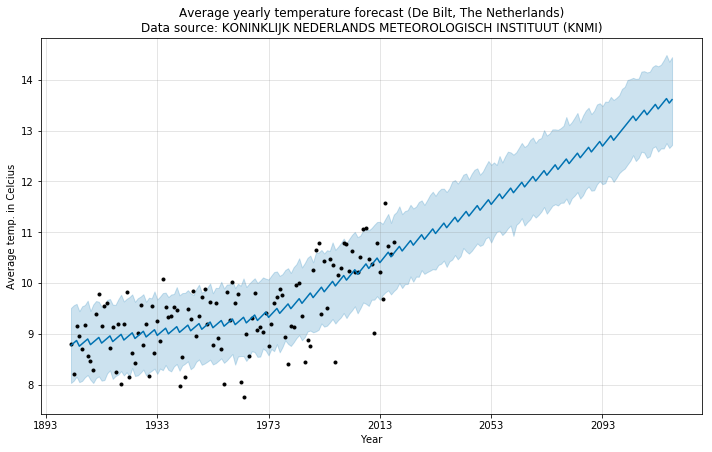

In [298]:
# Load and parse the data
temps = {}
with open('temp.txt') as f:
    lines = f.readlines()[28:]
    for line in lines:
        line = re.sub(' +', ' ', line)
        parts = line.replace('\t', ' ').split(' ')
        temps[parts[1]] = float(parts[2])
        
# Create a dataframe, and resample anually.
date, temp = zip(*[(datetime.datetime.strptime(key, '%Y%m%d'), temps[key]) for key in temps])
df = pd.DataFrame({'date':date, 'temp':temp})
df = df.set_index(pd.DatetimeIndex(df['date']))
df = df.resample('A').mean()[:-1]

# Prepare the dataframe for Prophet.
df = pd.DataFrame(data={'ds':df.index, 'y':df['temp']}).reset_index(drop=True)

# Create a model.
m = Prophet(weekly_seasonality=False, daily_seasonality=False)
m.fit(df)

# Create a forecast based on the model.
future = m.make_future_dataframe(periods=100, freq='y')
forecast = m.predict(future)

# Plotting the model.
m.plot(forecast)
plt.xlabel('Year')
plt.ylabel('Average temp. in Celcius')
plt.title('Average yearly temperature forecast (De Bilt, The Netherlands)\nData source: KONINKLIJK NEDERLANDS METEOROLOGISCH INSTITUUT (KNMI)');